<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%9B%D0%B0%D0%B1_4_%D0%9A%D1%83%D0%B4%D1%80%D1%8F%D1%88%D0%BE%D0%B2_%D0%94_%D0%90%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Согласно списку, выполняется Вариант 17. Анализ финансовых рисков
Согласно которому необходимо выполнить следующее:
1. На основе финансовых данных компании проведите анализ рисков.
2. Используйте статистические методы для оценки финансовой устойчивости
компании в 2023 году.

Мною был найден подходящий датасет, для выполнения задания:
https://www.kaggle.com/datasets/zibranzarif/industry-market-cap-analysis-dataset

Этот набор данных содержит финансовую информацию о 1500 компаниях в 8 различных отраслях

Содержание нашего датасета:Company,Company Path,Industry,Country,employees,
marketcap,revenue,earnings,operating-margin,total-assets,total-liabilities,total-debt,net-assets,pe-ratio,ps-ratio

1. Company - Компания: Полное наименование компании
2. Company Path - Путь компании: URL веб-сайта компании
3. Industry - Отрасль: Ассоциированная отрасль компании
4. Country - Страна: Местонахождение компании
5. employees - Сотрудники: Общее количество сотрудников компании
6. marketcap - Рыночная капитализация: Рыночная капитализация компании (по состоянию на март 2024 года)
7. revenue - Выручка: Текущая выручка компании (31 марта 2023 - 31 марта 2024)
8. earnings - Прибыль: Текущая прибыль компании (31 марта 2023 - 31 марта 2024)
9. operating-margin - Операционная маржа: текущая операционная маржа Компании (на конец 2023 года)
10. total-assets - Общие активы: Общие активы Компании (по состоянию на март 2024 года)
11. total-liabilities - Итого обязательства: Совокупные обязательства Компании
12. Total Debt: общий долг компании
13. net-assets - Чистые активы: Чистые активы Компании
14. pe-ratio - Мультипликатор PE: текущее соотношение цены и прибыли компании (31 марта 2023 - 31 марта 2024)
15. PS Ratio: текущее соотношение цены и продаж компании (31 марта 2023 г. - 31 марта 2024 г.)

В рамках данной задачи планируется использовать Z-score Альтмана, где
1. Z > 2.99: "Безопасная зона" - компания финансово устойчива
2. 1.81 ≤ Z ≤ 2.99: "Серая зона" - существует некоторый риск финансовых затруднений
3. Z < 1.81: "Опасная зона" - высокая вероятность банкротства в ближайшие 2 года

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# Загрузка данных с гугл диска
from google.colab import drive
drive.mount('/content/drive')

In [26]:
df = pd.read_csv('/content/drive/MyDrive/transformed_company_data.csv')
df.head()

,Company,Company Path,Industry,Country,employees,marketcap,revenue,earnings,operating-margin,total-assets,total-liabilities,total-debt,net-assets,pe-ratio,ps-ratio
0,Amazon,https://companiesmarketcap.com/amazon,Technology,USA,1500000,1.966000e+12,5.747800e+11,4.073000e+10,-0.0115,5.278500e+11,3.259700e+11,1.356100e+11,2.018700e+11,96.50,3.4200
1,Foxconn (Hon Hai Precision Industry),https://companiesmarketcap.com/foxconn,Technology,Taiwan,826608,6.475000e+10,1.983200e+11,6.160000e+09,0.0255,1.284000e+11,7.344000e+10,3.073000e+10,5.495000e+10,16.10,0.3255
2,Jingdong Mall,https://companiesmarketcap.com/jingdong-mall,Technology,China,450679,4.250000e+10,1.524800e+11,4.910000e+09,0.0255,8.618000e+10,4.482000e+10,9.750000e+09,4.135000e+10,13.70,0.2839
3,IBM,https://companiesmarketcap.com/ibm,Technology,USA,288300,1.704200e+11,6.185000e+10,8.690000e+09,0.0308,1.352400e+11,1.126200e+11,5.993000e+10,2.261000e+10,24.40,2.7600
4,Panasonic,https://companiesmarketcap.com/panasonic,Technology,Japan,232527,2.153000e+10,5.964000e+10,3.170000e+09,0.0487,6.321000e+10,3.229000e+10,1.130000e+10,3.092000e+10,7.18,0.3597


In [ ]:
# Согласно заданию сначала делаем визуализацию

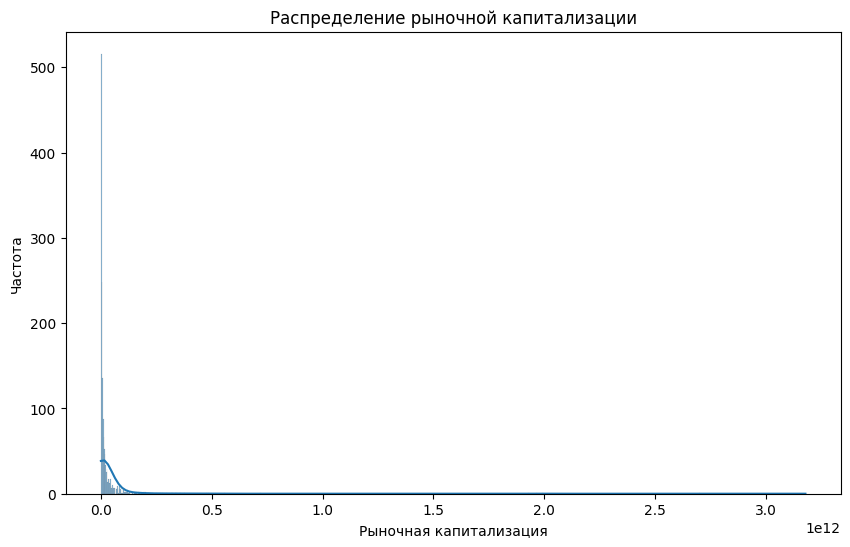

In [30]:
# Визуализация 1: Гистограмма распределения рыночной капитализации
plt.figure(figsize=(10, 6))
sns.histplot(df['marketcap'], kde=True)
plt.title('Распределение рыночной капитализации')
plt.xlabel('Рыночная капитализация')
plt.ylabel('Частота')
plt.savefig('market_cap_distribution.png')
plt.show()

На гистограмме видно, что распределение рыночной капитализации сильно скошено вправо. Это означает, что большинство компаний имеют небольшую рыночную капитализацию, а лишь небольшое количество компаний имеют очень высокую рыночную капитализацию. Также на графике можно заметить, что плотность распределения рыночной капитализации резко падает после пика. Это говорит о том, что большая часть компаний имеют рыночную капитализацию ниже определенного порога, а количество компаний с высокой рыночной капитализацией значительно меньше.

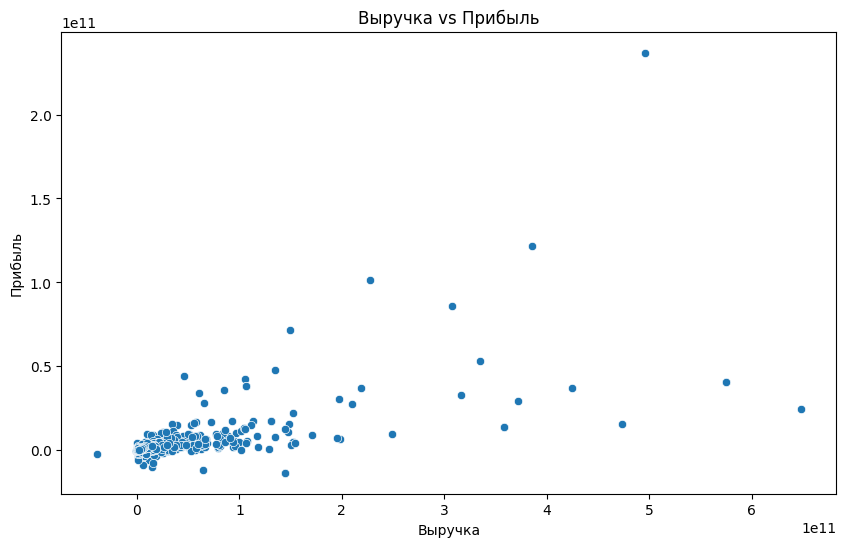

In [31]:
# Визуализация 2: Scatter plot выручки vs прибыли
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revenue', y='earnings', data=df)
plt.title('Выручка vs Прибыль')
plt.xlabel('Выручка')
plt.ylabel('Прибыль')
plt.savefig('revenue_vs_earnings.png')
plt.show()


На графике показана зависимость, на которой видно, что корреляция между этими показателями очень слабая. Есть несколько точек, которые аномальны, что может говорить о том, что данные компании в эти периоды работали с очень высокой прибылью по отношению к выручке.

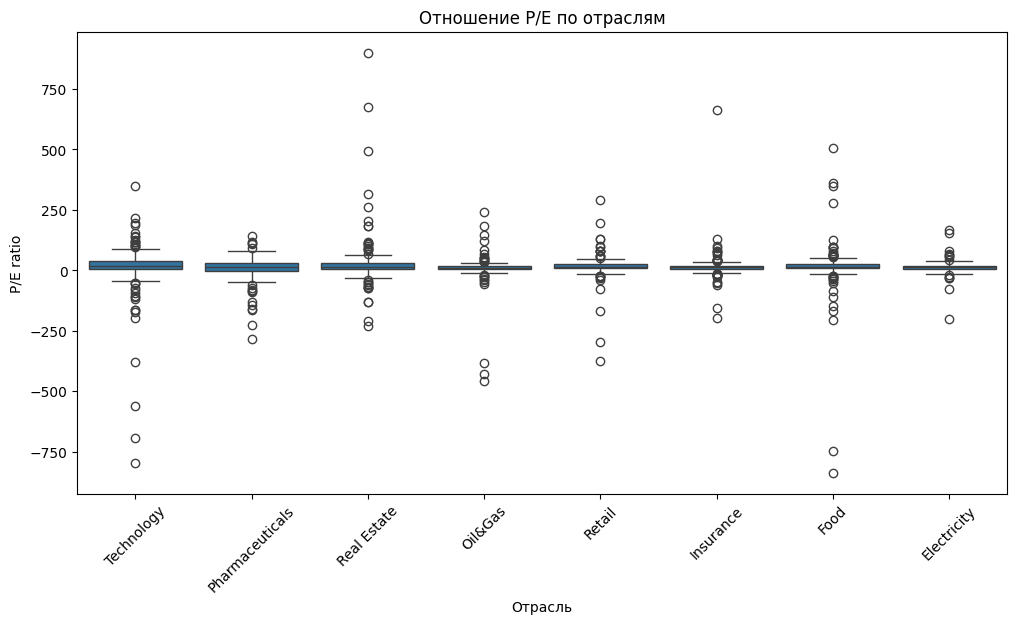

In [32]:
# Визуализация 3: Box plot отношения P/E по отраслям
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='pe-ratio', data=df)
plt.title('Отношение P/E по отраслям')
plt.xlabel('Отрасль')
plt.ylabel('P/E ratio')
plt.xticks(rotation=45)
plt.savefig('pe_ratio_by_industry.png')
plt.show()

Из графика также видно, что медианное отношение P/E для большинства отраслей находится в районе 0, что указывает на то, что цена акций компаний в этих отраслях, как правило, соответствует их прибыли.

In [9]:
# 2. Далее придерживаясь структуры выполнения задания проведём анализ рисков и оценку финансовой устойчивости

In [27]:
# Преобразование строковых значений в числовые
numeric_columns = ['marketcap', 'revenue', 'earnings', 'operating-margin', 'total-assets',
                   'total-liabilities', 'total-debt', 'net-assets', 'pe-ratio', 'ps-ratio']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace('[\$,]', '', regex=True), errors='coerce')

print("\nКоличество непустых значений в каждом столбце:")
print(df[numeric_columns].count())

print("\nПроцент непустых значений в каждом столбце:")
print((df[numeric_columns].count() / len(df) * 100).round(2))

print("\nПервые несколько строк данных:")
print(df[['Company'] + numeric_columns].head())

print("\nОписательная статистика для числовых столбцов:")
print(df[numeric_columns].describe())


Количество непустых значений в каждом столбце:
marketcap            1497
revenue              1499
earnings             1498
operating-margin     1305
total-assets         1499
total-liabilities    1499
total-debt           1486
net-assets           1497
pe-ratio             1454
ps-ratio             1483
dtype: int64

Процент непустых значений в каждом столбце:
marketcap            99.80
revenue              99.93
earnings             99.87
operating-margin     87.00
total-assets         99.93
total-liabilities    99.93
total-debt           99.07
net-assets           99.80
pe-ratio             96.93
ps-ratio             98.87
dtype: float64

Первые несколько строк данных:
                                Company     marketcap       revenue  \
0                                Amazon  1.966000e+12  5.747800e+11   
1  Foxconn (Hon Hai Precision Industry)  6.475000e+10  1.983200e+11   
2                         Jingdong Mall  4.250000e+10  1.524800e+11   
3                                

In [28]:
# После преобразования числовых столбцов
print("\nПроверка на наличие NaN значений:")
print(df[numeric_columns].isna().sum())

print("\nПроверка на наличие нулевых значений:")
print((df[numeric_columns] == 0).sum())


Проверка на наличие NaN значений:
marketcap              3
revenue                1
earnings               2
operating-margin     195
total-assets           1
total-liabilities      1
total-debt            14
net-assets             3
pe-ratio              46
ps-ratio              17
dtype: int64

Проверка на наличие нулевых значений:
marketcap             0
revenue               0
earnings              0
operating-margin     11
total-assets          0
total-liabilities     0
total-debt            0
net-assets            0
pe-ratio              0
ps-ratio              1
dtype: int64


In [29]:
# Очистка данных: замена нулевых значений на NaN
df[numeric_columns] = df[numeric_columns].replace(0, np.nan)

# Заполнение NaN значений медианой для каждого столбца
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Удаление строк, где все значения NaN
df.dropna(how='all', subset=numeric_columns, inplace=True)

print("\nКоличество непустых значений в каждом столбце после очистки:")
print(df[numeric_columns].count())

print("\nПроцент непустых значений в каждом столбце после очистки:")
print((df[numeric_columns].count() / len(df) * 100).round(2))

print("\nПервые несколько строк данных после очистки:")
print(df[['Company'] + numeric_columns].head())

print("\nОписательная статистика для числовых столбцов после очистки:")
print(df[numeric_columns].describe())


Количество непустых значений в каждом столбце после очистки:
marketcap            1500
revenue              1500
earnings             1500
operating-margin     1500
total-assets         1500
total-liabilities    1500
total-debt           1500
net-assets           1500
pe-ratio             1500
ps-ratio             1500
dtype: int64

Процент непустых значений в каждом столбце после очистки:
marketcap            100.0
revenue              100.0
earnings             100.0
operating-margin     100.0
total-assets         100.0
total-liabilities    100.0
total-debt           100.0
net-assets           100.0
pe-ratio             100.0
ps-ratio             100.0
dtype: float64

Первые несколько строк данных после очистки:
                                Company     marketcap       revenue  \
0                                Amazon  1.966000e+12  5.747800e+11   
1  Foxconn (Hon Hai Precision Industry)  6.475000e+10  1.983200e+11   
2                         Jingdong Mall  4.250000e+10  1.52480

<ipython-input-29-0020f561f68f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [33]:
# Расчет модифицированного Z-score
def calculate_modified_z_score(row):
    A = row['net-assets'] / row['total-assets'] if row['total-assets'] != 0 else 0
    B = row['earnings'] / row['total-assets'] if row['total-assets'] != 0 else 0
    C = row['marketcap'] / row['total-liabilities'] if row['total-liabilities'] != 0 else 0
    D = row['revenue'] / row['total-assets'] if row['total-assets'] != 0 else 0

    Z = 1.2*A + 3.3*B + 0.6*C + 1.0*D
    return Z

In [34]:
# Применение функции к каждой строке DataFrame
df['z_score'] = df.apply(calculate_modified_z_score, axis=1)

print("\nПервые несколько значений Z-score:")
print(df['z_score'].head())


Первые несколько значений Z-score:
0    5.421206
1    2.745421
2    3.102048
3    1.777940
4    2.096075
Name: z_score, dtype: float64


In [35]:
# Определение категории риска
def risk_category(z_score):
    if z_score > 2.6:
        return 'Безопасная зона'
    elif 1.1 <= z_score <= 2.6:
        return 'Серая зона'
    else:
        return 'Опасная зона'

df['risk_category'] = df['z_score'].apply(risk_category)

print("\nРаспределение категорий риска:")
print(df['risk_category'].value_counts())


Распределение категорий риска:
risk_category
Безопасная зона    652
Серая зона         521
Опасная зона       327
Name: count, dtype: int64


In [37]:
# Анализ рентабельности
df['roa'] = df['earnings'] / df['total-assets']
print("\nАнализ рентабельности (ROA):")
print(df['roa'].describe())


Анализ рентабельности (ROA):
count    1500.000000
mean        0.025924
std         0.606219
min       -22.813688
25%         0.011222
50%         0.049505
75%         0.095287
max         0.588235
Name: roa, dtype: float64


1. в среднем компании в выборке генерируют прибыль в размере 2.59% от стоимости их активов
2. есть компании с очень низкими или отрицательными значениями ROA, которые тянут среднее вниз
3. -22.813688 или -2281.37% Экстремально низкое отрицательное значение. Это может указывать на компанию, которая несет огромные убытки относительно своих активов. Возможно, это компания в кризисной ситуации или стартап с большими инвестициями и пока отрицательной прибылью.
4. 25% компаний имеют ROA ниже 1.12%
50% компаний имеют ROA ниже 4.95%
75% компаний имеют ROA ниже 9.53%


In [38]:
# Расчет коэффициента текущей ликвидности
df['current_ratio'] = df['total-assets'] / df['total-liabilities']
print("\nКоэффициент текущей ликвидности:")
print(df['current_ratio'].describe())


Коэффициент текущей ликвидности:
count    1500.000000
mean        2.064171
std         1.529093
min         0.109583
25%         1.317870
50%         1.617413
75%         2.232045
max        23.809524
Name: current_ratio, dtype: float64


Некоторые компании имеют очень высокую ликвидность, что может указывать на консервативную финансовую политику или неэффективное использование активов

In [39]:
# Расчет коэффициента долговой нагрузки
df['debt_ratio'] = df['total-debt'] / df['total-assets']
print("\nКоэффициент долговой нагрузки:")
print(df['debt_ratio'].describe())


Коэффициент долговой нагрузки:
count    1.500000e+03
mean     3.310526e-01
std      1.050680e+00
min      2.697872e-07
25%      1.176479e-01
50%      2.696179e-01
75%      4.225686e-01
max      3.772735e+01
Name: debt_ratio, dtype: float64


Большинство компаний в выборке имеют умеренный уровень долговой нагрузки, что позитивно влияет на их финансовую устойчивость. Одновременно с этим присутствуют компании с экстремально высокой долговой нагрузкой, что может сигнализировать о серьезных финансовых проблемах

In [40]:
# Расчет Z-score Альтмана (упрощенная версия)
df['z_score_altman'] = 1.2 * (df['total-assets'] - df['total-liabilities']) / df['total-assets'] + \
                1.4 * df['earnings'] / df['total-assets'] + \
                3.3 * df['earnings'] / df['total-assets'] + \
                0.6 * df['marketcap'] / df['total-liabilities'] + \
                1.0 * df['revenue'] / df['total-assets']
print("\nZ-score Альтмана:")
print(df['z_score_altman'].describe())


Z-score Альтмана:
count    1500.000000
mean        3.521537
std         6.151162
min       -76.270144
25%         1.247661
50%         2.348365
75%         3.963537
max        93.458213
Name: z_score_altman, dtype: float64


In [41]:
# Оценка риска на основе Z-score
df['risk_level'] = pd.cut(df['z_score_altman'],
                          bins=[-np.inf, 1.8, 3, np.inf],
                          labels=['High', 'Grey Zone', 'Low'])
print("\nРаспределение уровней риска:")
print(df['risk_level'].value_counts(normalize=True))



Распределение уровней риска:
risk_level
High         0.388667
Low          0.372000
Grey Zone    0.239333
Name: proportion, dtype: float64


In [42]:
# Статистический анализ
financial_metrics = ['current_ratio', 'debt_ratio', 'roa', 'z_score_altman']
stats_summary = df[financial_metrics].describe()
print("\nСтатистический анализ финансовых метрик:")
print(stats_summary)


Статистический анализ финансовых метрик:
       current_ratio    debt_ratio          roa  z_score_altman
count    1500.000000  1.500000e+03  1500.000000     1500.000000
mean        2.064171  3.310526e-01     0.025924        3.521537
std         1.529093  1.050680e+00     0.606219        6.151162
min         0.109583  2.697872e-07   -22.813688      -76.270144
25%         1.317870  1.176479e-01     0.011222        1.247661
50%         1.617413  2.696179e-01     0.049505        2.348365
75%         2.232045  4.225686e-01     0.095287        3.963537
max        23.809524  3.772735e+01     0.588235       93.458213


In [43]:
correlation_matrix = df[financial_metrics].corr()
print("\nКорреляционная матрица:")
print(correlation_matrix)


Корреляционная матрица:
                current_ratio  debt_ratio       roa  z_score_altman
current_ratio        1.000000   -0.021903  0.056841        0.608527
debt_ratio          -0.021903    1.000000  0.011522        0.006367
roa                  0.056841    0.011522  1.000000        0.389068
z_score_altman       0.608527    0.006367  0.389068        1.000000


In [ ]:
# Сохранение результатов в CSV
df.to_csv('financial_analysis_results.csv', index=False)
stats_summary.to_csv('financial_metrics_summary.csv')
correlation_matrix.to_csv('financial_metrics_correlation.csv')


Топ 10 компаний с наивысшим Z-score:
                       Company  z_score_altman
1135                     DMart       93.458213
757                    Keyence       75.684893
135   Jiangsu Hengrui Medicine       65.143641
76                      NVIDIA       63.884362
1395             Fine Organics       56.884727
578                 PB Fintech       45.187540
745                 PB Fintech       45.187540
1343                    Zomato       44.302202
746                 Tata Elxsi       44.067483
143         Divis Laboratories       40.202846

Нижние 10 компаний с наименьшим Z-score:
                    Company  z_score_altman
1377              Missfresh      -76.270144
850   Sorrento Therapeutics       -6.119697
779                    GoTo       -4.061131
868             ImmunityBio       -3.481879
801      Endo International       -3.350874
875                FibroGen       -3.244910
885    Revance Therapeutics       -2.609625
851                Alvotech       -2.559637
886    

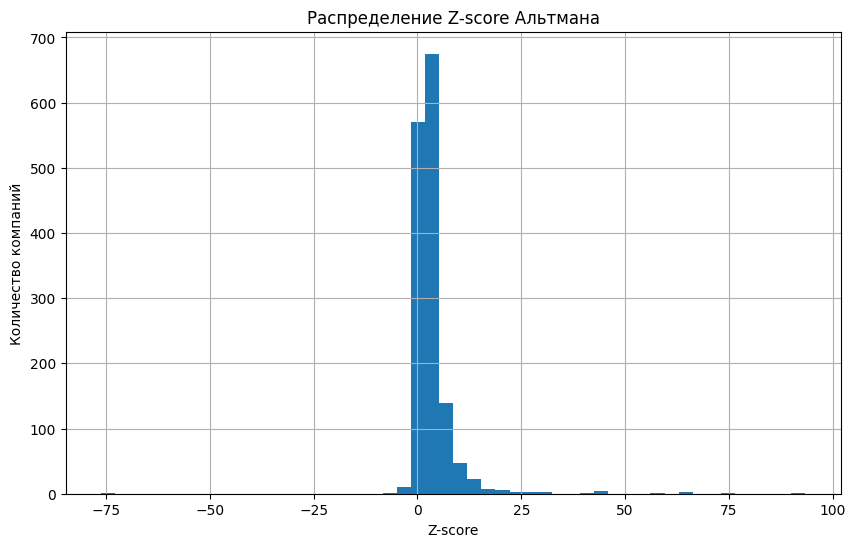

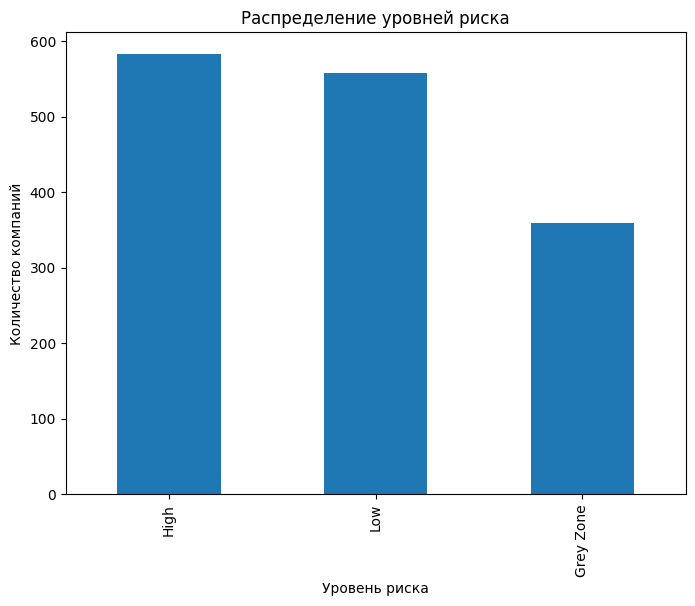


Корреляционная матрица:
                z_score_altman  marketcap   revenue  earnings  debt_ratio
z_score_altman        1.000000   0.177167  0.012606  0.076476    0.006367
marketcap             0.177167   1.000000  0.591808  0.755168   -0.016934
revenue               0.012606   0.591808  1.000000  0.648541   -0.027195
earnings              0.076476   0.755168  0.648541  1.000000   -0.021499
debt_ratio            0.006367  -0.016934 -0.027195 -0.021499    1.000000


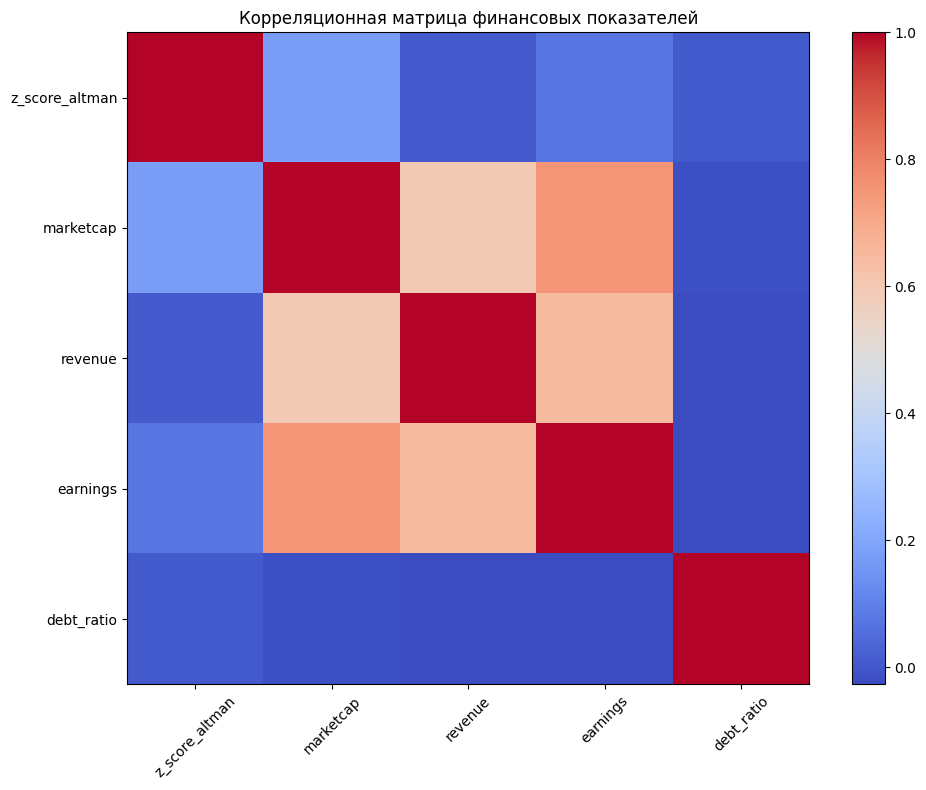

In [45]:
# Дополнительный анализ: топ 10 компаний по Z-score
print("\nТоп 10 компаний с наивысшим Z-score:")
print(df.nlargest(10, 'z_score_altman')[['Company', 'z_score_altman']])

# Дополнительный анализ: нижние 10 компаний по Z-score
print("\nНижние 10 компаний с наименьшим Z-score:")
print(df.nsmallest(10, 'z_score_altman')[['Company', 'z_score_altman']])

# Анализ по секторам (если есть такая информация)
if 'Sector' in df.columns:
    print("\nСредний Z-score по секторам:")
    print(df.groupby('Sector')['z_score_altman'].mean().sort_values(ascending=False))

# Визуализация распределения Z-score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['z_score_altman'].hist(bins=50)
plt.title('Распределение Z-score Альтмана')
plt.xlabel('Z-score')
plt.ylabel('Количество компаний')
plt.show()

# Визуализация распределения уровней риска
plt.figure(figsize=(8, 6))
df['risk_level'].value_counts().plot(kind='bar')
plt.title('Распределение уровней риска')
plt.xlabel('Уровень риска')
plt.ylabel('Количество компаний')
plt.show()

# Корреляция между Z-score и другими финансовыми показателями
correlation_matrix = df[['z_score_altman', 'marketcap', 'revenue', 'earnings', 'debt_ratio']].corr()
print("\nКорреляционная матрица:")
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Корреляционная матрица финансовых показателей')
plt.tight_layout()
plt.show()

Вывод:

1. Z-score Альтмана не имеет сильной линейной зависимости от отдельных финансовых показателей в этой выборке. Это может указывать на то, что Z-score действительно является комплексным показателем, учитывающим различные аспекты финансового состояния компании

2. Рыночная капитализация имеет наиболее сильную связь с прибылью, что логично, так как инвесторы часто оценивают компании на основе их способности генерировать прибыль

3. Выручка и прибыль также имеют умеренную положительную корреляцию, что ожидаемо, так как рост выручки часто приводит к росту прибыли

4. Отсутствие сильной корреляции между Z-score и коэффициентом задолженности может указывать на то, что уровень долга сам по себе не является определяющим фактором в оценке риска банкротства по модели Альтмана

5. Слабая корреляция Z-score с другими показателями может также указывать на то, что модель Альтмана учитывает комплексное взаимодействие различных финансовых факторов, которое не отражается в простых парных корреляциях

# **Попробуем провести более глубокий анализ**


In [49]:
# Анализ факторов, влияющих на Z-score
from sklearn.linear_model import LinearRegression
import seaborn as sns

X = df[['roa', 'current_ratio', 'debt_ratio', 'marketcap', 'revenue', 'earnings']]
y = df['z_score_altman']

model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов влияния
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

print("\nВлияние факторов на Z-score:")
print(coefficients)


Влияние факторов на Z-score:
         Feature   Coefficient
0            roa  3.577770e+00
1  current_ratio  2.347164e+00
2     debt_ratio  9.401787e-02
3      marketcap  9.887646e-12
4        revenue -4.886314e-12
5       earnings -8.164427e-11


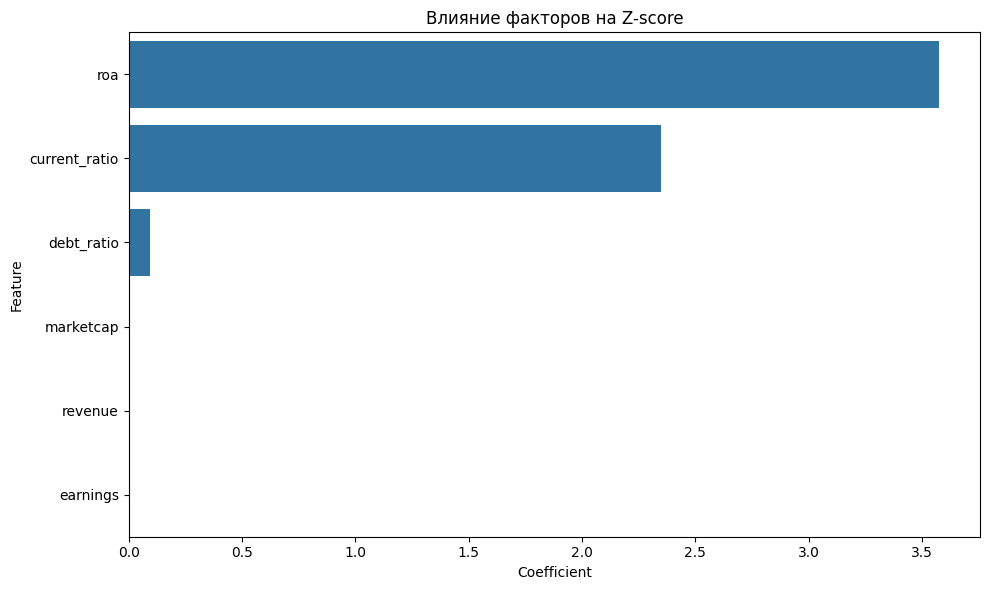

In [50]:
# Визуализация влияния факторов
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Влияние факторов на Z-score')
plt.tight_layout()
plt.savefig('factor_influence_on_zscore.png')
plt.show()

In [51]:
# Определение опасных и безопасных компаний
dangerous_companies = df[df['risk_level'] == 'High']
safe_companies = df[df['risk_level'] == 'Low']

# 5. Сравнение средних значений ключевых метрик
metrics = ['roa', 'current_ratio', 'debt_ratio', 'marketcap', 'revenue', 'earnings']
comparison = pd.DataFrame({
    'Опасная зона': dangerous_companies[metrics].mean(),
    'Безопасная зона': safe_companies[metrics].mean()
})
comparison['Разница'] = comparison['Безопасная зона'] - comparison['Опасная зона']
comparison['Процентная разница'] = (comparison['Разница'] / comparison['Опасная зона']) * 100

print("\nСравнение средних значений ключевых метрик:")
print(comparison)


Сравнение средних значений ключевых метрик:
               Опасная зона  Безопасная зона       Разница  Процентная разница
roa           -6.126018e-02     1.008024e-01  1.620626e-01         -264.548069
current_ratio  1.477474e+00     2.834179e+00  1.356705e+00           91.825991
debt_ratio     3.447346e-01     3.141010e-01 -3.063361e-02           -8.886142
marketcap      1.149765e+10     6.673146e+10  5.523381e+10          480.392120
revenue        1.088902e+10     2.177171e+10  1.088269e+10           99.941850
earnings       7.712845e+08     3.103390e+09  2.332105e+09          302.366414


1. Безопасные компании демонстрируют лучшие показатели по всем ключевым метрикам, кроме коэффициента задолженности, где разница незначительна
2. Наибольшие различия наблюдаются в рыночной капитализации, прибыли и ROA, что указывает на важность этих показателей для финансовой устойчивости
3. Хотя у безопасных компаний долговая нагрузка ненамного ниже, их способность обслуживать долг, вероятно, выше из-за лучших показателей прибыли и ликвидности

<Figure size 1200x800 with 0 Axes>

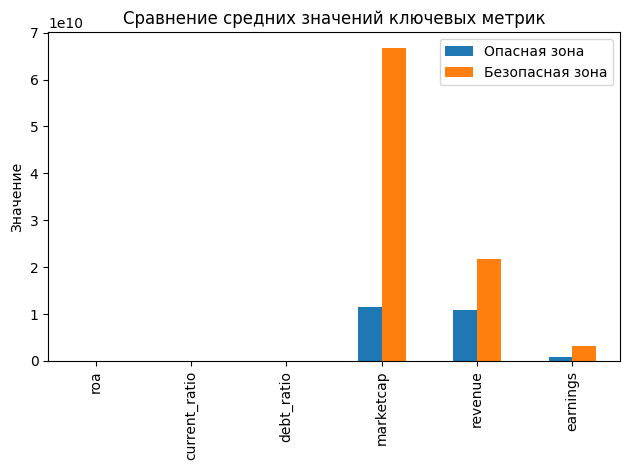

In [52]:
# Визуализация сравнения средних значений
plt.figure(figsize=(12, 8))
comparison[['Опасная зона', 'Безопасная зона']].plot(kind='bar')
plt.title('Сравнение средних значений ключевых метрик')
plt.ylabel('Значение')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('metrics_comparison.png')
plt.show()

In [53]:
# Анализ отраслевых тенденций (если есть информация об отрасли)
if 'Industry' in df.columns:
    industry_risk = df.groupby('Industry')['risk_level'].value_counts(normalize=True).unstack()
    industry_risk = industry_risk.sort_values('High', ascending=False)

    print("\nРаспределение категорий риска по отраслям:")
    print(industry_risk)


Распределение категорий риска по отраслям:
risk_level        High  Grey Zone    Low
Industry                                
Insurance        0.820      0.085  0.095
Electricity      0.740      0.200  0.060
Real Estate      0.625      0.245  0.130
Oil&Gas          0.280      0.355  0.365
Pharmaceuticals  0.260      0.160  0.580
Retail           0.195      0.270  0.535
Technology       0.195      0.215  0.590
Food             0.170      0.365  0.465


# **И так после более глубокго анализа можно сформулировать следующий вывод по данным:**

# 1. Наиболее рискованными отраслями являются страхование, электроэнергетика и недвижимость.
# 2. Наиболее устойчивыми выглядят технологический сектор, фармацевтика и пищевая промышленность.
# 3. Нефтегазовый сектор показывает разнообразие рисков, что может отражать различия между компаниями в отрасли.
# 4. Розничная торговля демонстрирует низкий уровень риска, что может быть связано с адаптацией к новым условиям рынка.